This part of the assignment is to get you introduced to using gradient descent within torch. You will be using input\
”data” generated (and visualised) like this:

(0.06866376101970673,
 2.03598453104496,
 0.012595944106578827,
 2.0532793179154396)

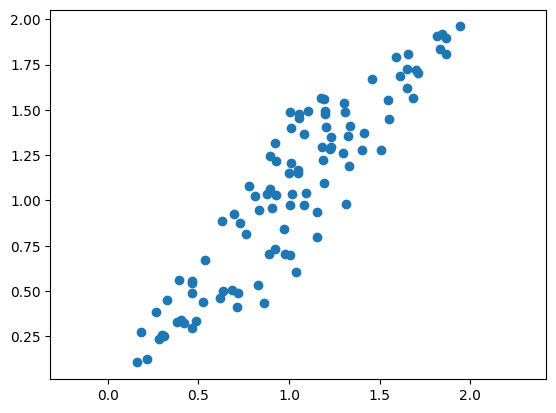

In [302]:
import matplotlib.pyplot as plt
import numpy as np
import torch
# make up some data for x
D = 2
x= torch.rand(100,D)
x[:,0] = x[:,0] + x[:,1]
x[:,1] = 0.5*x[:,0] + x[:,1]
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

An autoencoder is an unsupervised learner that carries out dimensionality reduction by mapping the data into a lower dimensional space and back ”out” again to form a ”reconstruction”. \
The loss is some measure of the difference between the original data items and their reconstructions.\
![pic](assets/pic1.jpg "Magic Gardens")

## Encoder function
### Input
* the shape of input x: (1,2)
* w_encoder: weight of encoder
* b_encoder: bias of encoder
### Output
* the shape of output: z (1)
### Variable
* encoder:\
 $z = x_0*w{0_encoder} + x_1*w{1encoder} + b_{encoder}$
* an encoder, which takes the 2-d inputs and produces a 1-dimensional z via a weighted sum plus a bias. 
* The encoder weights will be a 1-by-2 tensor and the encoder bias will be a 1-by-1 tensor.

In [303]:
def encoder(x, w_encoder, b_encoder):
    # Encoder: z = x0*w0_encoder + x_1*w_1_encoder + b_encoder
    z = torch.mm(x,w_encoder) + b_encoder
    return z

In [304]:
def decoder(z,w_decoder,b_decoder):
    z = torch.mm(w_decoder,z) + b_decoder
    return z

In [305]:
import torch
#import torch.nn.functional.mse_loss as MSE
import torch.nn.functional as F
def loss(predict,target):
    return F.mse_loss(predict,target)

In [306]:
def f(x,w):
    wEncoder = w[0]
    wDecoder = w[1]
    bEncoder = w[2]
    bDecoder = w[3]
    v_encoded = encoder(x,wEncoder,bEncoder)
    v_decoded = decoder(v_encoded,wEncoder,bEncoder)
    return v_decoded

In [307]:
STEPS = 1000
# init the weights and biass in encoder and decoder
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)
w = [wEncoder,wDecoder,bEncoder,bDecoder]

# init the optim
opt = torch.optim.SGD(params=w, lr=0.01, momentum=0)

for t in range(STEPS):
    x_reconstruction = torch.rand(100,D)

    # calculate y   
    for i in range(100):
        t = torch.tensor([[x[i,0],x[i,1]]])
        x_reconstruction[i] = f(t,w).T

    # 偏导数置零
    opt.zero_grad()
    l = loss(x_reconstruction,x.detach())
    print(l)
    l.backward()
    opt.step()



tensor(8.5099, grad_fn=<MseLossBackward0>)
tensor(7.4121, grad_fn=<MseLossBackward0>)
tensor(6.4963, grad_fn=<MseLossBackward0>)
tensor(5.7126, grad_fn=<MseLossBackward0>)
tensor(5.0296, grad_fn=<MseLossBackward0>)
tensor(4.4270, grad_fn=<MseLossBackward0>)
tensor(3.8909, grad_fn=<MseLossBackward0>)
tensor(3.4119, grad_fn=<MseLossBackward0>)
tensor(2.9833, grad_fn=<MseLossBackward0>)
tensor(2.6002, grad_fn=<MseLossBackward0>)
tensor(2.2585, grad_fn=<MseLossBackward0>)
tensor(1.9549, grad_fn=<MseLossBackward0>)
tensor(1.6866, grad_fn=<MseLossBackward0>)
tensor(1.4506, grad_fn=<MseLossBackward0>)
tensor(1.2442, grad_fn=<MseLossBackward0>)
tensor(1.0646, grad_fn=<MseLossBackward0>)
tensor(0.9091, grad_fn=<MseLossBackward0>)
tensor(0.7751, grad_fn=<MseLossBackward0>)
tensor(0.6601, grad_fn=<MseLossBackward0>)
tensor(0.5619, grad_fn=<MseLossBackward0>)
tensor(0.4781, grad_fn=<MseLossBackward0>)
tensor(0.4069, grad_fn=<MseLossBackward0>)
tensor(0.3465, grad_fn=<MseLossBackward0>)
tensor(0.29

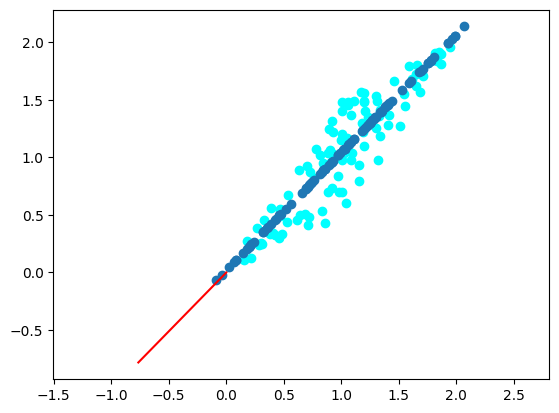

In [308]:
import matplotlib.pyplot as plt

def plot(x,x_reconstruction,wEncoder):
    plt.plot([0,wEncoder.detach()[0,0]], [0,wEncoder.detach()[1,0]],'-r')
    plt.scatter(x[:,0].detach().numpy(),x[:,1].detach().numpy(),color='cyan')
    plt.scatter(x_reconstruction.detach()[:,0],x_reconstruction.detach()[:,1])
    plt.axis('equal')
plot(x,x_reconstruction,w[0])

In [309]:
saved = np.ones((STEPS,len(w),2))
saved.shape

(1000, 4, 2)